<a href="https://colab.research.google.com/github/Dykim991222/MLstudy/blob/main/%ED%85%8D%EC%8A%A4%ED%8A%B8%EC%A0%84%EC%B2%98%EB%A6%AC(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한글 전처리 실습

영문은 공백으로 토큰화가 가능하지만, 한글의 경우 품사를 고려하여 토큰화해야 한다.

In [81]:
kor_text = '''포스코ICT는 25일 경기도 판교 사옥에서 청소년들이 개발한 인공지능(AI) 기반 애플리케이션을 직접 선보이는 ‘2022 AI 유스 챌린지(Youth Challenge)’를 개최했다. 청소년들은 기성세대들이 생각하지 못했던 참신한 아이디어를 바탕으로 AI 시스템을 개발해 관심을 모았다.

예선을 거쳐 본선에 오른 전국 중·고교 7개팀은 지난 달부터 포스코ICT 소속 AI 엔지니어의 코칭 속에 개발한 AI 시스템을 직접 시연했다. 심사는 카이스트, 포스텍, 연세대 교수 등으로 구성된 평가위원들과 포스코ICT 직원들로 구성된 내부 평가위원들이 맡았다. 우수작은 과기정통부장관상(1팀), 포스코ICT사장상(1팀), 지능정보산업협회장상(1팀), 우수상(2팀), 장려상(2팀) 등으로 나눠 각각 시상했다. 포스코ICT는 AI 기술을 접목해 환경·안전·사회문제를 해결할 수 있는 청소년들의 아이디어를 발굴하기 위해 이번 공모전을 개최했다. 평소 AI 기술을 접할 기회가 부족했던 청소년들은 멘토링을 통해 산업현장에서 실제 활용되는 기술을 자연스럽게 체험하고 진로 결정에도 도움을 받을 수 있었다.

이번 공모전에 참여한 김희주 학생은 “막연히 생각했던 아이디어를 실제 AI 전문가들과 구체화해나가며 접하지 못했던 지식과 기술을 배울 수 있었고 AI 분야에 더 큰 관심을 가지게 됐다”고 말했다.

학생들의 멘토를 맡은 포스코ICT 최영철 연구원은 “학생들의 열정과 창의적인 아이디어를 접하며 새로운 자극을 받아 재미있게 멘토링에 참여했다”며 “그동안 AI 분야에서 쌓아온 재능을 기부해 AI 전문가를 꿈꾸는 청소년들에게 전해줄 수 있어 의미 있었다”고 밝혔다. 한편, 포스코ICT는 아주대학교 대학원과 ‘AI 전문인력 양성을 위한 업무협약’을 체결해 프로그램을 운영하고 있다. 지난 24일에는 인공지능학과 대학원 과정에 재학 중인 우수 인재를 선발해 장학금을 지급했다.

이번에 선발된 학생에게는 졸업 때까지 매달 장학금을 지급하고, 포스코ICT의 AI 전문가와의 1대1 멘토링 및 각종 기술 교육, 세미나 참석을 비롯해 채용 기회까지 제공할 계획이다. 김현일 기자'''

#### 형태소 분석기별 메서드 정리
출처 : https://konlpy-ko.readthedocs.io/ko/v0.4.3/

---
1) Hannanum : KAIST에서 개발   
- analyze : 다양한 형태학적 후보를 반환
- morphs : 형태소 토큰화
- nouns : 명사 토큰만 반환
- pos : 형태소에 품사 태깅하여 반환
---  
2) Kkma : 서울대에서 개발
- morphs : 형태소 토큰화
- nouns : 명사 토큰만 반환
- pos : 형태소에 품사 태깅하여 반환
- sentences : 문장 토큰화
---  
3) Komoran : Shineware팀에서 개발
- morphs : 형태소 토큰화
- nouns : 명사 토큰만 반환
- pos : 형태소에 품사 태깅하여 반환
---
4) Mecab : 교토대에서 일본어용으로 개발된 분석기, 은전 프로젝트에 의해 한국어용 개발
- morphs : 형태소 토큰화
- nouns : 명사 토큰만 반환
- pos : 형태소에 품사 태깅하여 반환
---
5) Okt(Twitter) : Will Hohyon Ryu가 개발
- morphs : 형태소 토큰화
- nouns : 명사 토큰만 반환
- phrases : 다양한 형태학적 후보를 반환
- pos : 형태소에 품사 태깅하여 반환


In [82]:
!pip install konlpy

In [83]:
from konlpy.tag import Hannanum, Okt, Kkma

In [84]:
okt = Okt()

In [85]:
okt.morphs(kor_text)[:7] # 형태소 분석기 : 형태소 단위로 쪼개기

['포스코', 'ICT', '는', '25일', '경기도', '판교', '사옥']

In [86]:
okt.nouns(kor_text)[:7] # 명사 추출

['포스코', '경기도', '판교', '사옥', '청소년', '개발', '인공']

In [87]:
okt.pos(kor_text)[:7] # 품사 태깅

[('포스코', 'Noun'),
 ('ICT', 'Alpha'),
 ('는', 'Verb'),
 ('25일', 'Number'),
 ('경기도', 'Noun'),
 ('판교', 'Noun'),
 ('사옥', 'Noun')]

In [88]:
okt.morphs('진짜 너무너무 성공하고 싶은데 될때까지 간다', stem = True)

['진짜', '너무', '너무', '성공하다', '싶다', '되다', '때', '까지', '간다']

In [89]:
okt.morphs('진짜 너무너무 성공하고 싶은데 될때까지 간다', stem=False)

['진짜', '너무', '너무', '성공하고', '싶은데', '될', '때', '까지', '간다']

다양한 분석기가 있지만 Okt로 실험

In [90]:
# Okt 토큰화
from konlpy.tag import Okt
okt = Okt()
kor_text = "인간이 컴퓨터와 대화하고 있다는 것을 꺠닫지 못하고 인간과 대화를 계속할 수 있다면 컴퓨터는 지능적인 것으로 간주될 수 있다."
okt_tokens = okt.morphs(kor_text)
print(okt_tokens)

['인간', '이', '컴퓨터', '와', '대화', '하고', '있다는', '것', '을', '꺠닫', '지', '못', '하고', '인간', '과', '대화', '를', '계속', '할', '수', '있다면', '컴퓨터', '는', '지능', '적', '인', '것', '으로', '간주', '될', '수', '있다', '.']


In [91]:
kor_text = '그래욬ㅋㅋㅋ잘해봅시다! 잘하고 있지만 더 잘해보면 좋지 않을까라고 생각하는 중'

In [92]:
print(okt.morphs(kor_text, norm=False))

['그래욬', 'ㅋㅋㅋ', '잘', '해봅시다', '!', '잘', '하고', '있지만', '더', '잘', '해보면', '좋지', '않을까', '라고', '생각', '하는', '중']


In [93]:
print(okt.morphs(kor_text, norm=True)) #표현을 정규화 -> 비표준 표현을 표준적인 형태료 변환

['그래요', 'ㅋㅋㅋ', '잘', '해봅시다', '!', '잘', '하고', '있지만', '더', '잘', '해보면', '좋지', '않을까', '라고', '생각', '하는', '중']


In [94]:
print(okt.morphs(kor_text, norm=True, stem=True)) #표현정규화, 어간추출 동사,형용사 원형복구

['그렇다', 'ㅋㅋㅋ', '잘', '해보다', '!', '잘', '하다', '있다', '더', '잘', '해보다', '좋다', '않다', '라고', '생각', '하다', '중']


한글 품사 부착

In [95]:
kor_text = "인간이 컴퓨터와 대화하고 있다는 것을 꺠닫지 못하고 인간과 대화를 계속할 수 있다면 컴퓨터는 지능적인 것으로 간주될 수 있다."
okt_tokens = okt.morphs(kor_text)

In [96]:
oktTag = []
for token in okt_tokens:
  oktTag += okt.pos(token)
print(oktTag)

[('인간', 'Noun'), ('이', 'Noun'), ('컴퓨터', 'Noun'), ('와', 'Verb'), ('대화', 'Noun'), ('하고', 'Verb'), ('있다는', 'Adjective'), ('것', 'Noun'), ('을', 'Josa'), ('꺠닫', 'Noun'), ('지', 'Verb'), ('못', 'Noun'), ('하고', 'Verb'), ('인간', 'Noun'), ('과', 'Noun'), ('대화', 'Noun'), ('를', 'Noun'), ('계속', 'Noun'), ('할', 'Verb'), ('수', 'Noun'), ('있다면', 'Adjective'), ('컴퓨터', 'Noun'), ('는', 'Verb'), ('지능', 'Noun'), ('적', 'Noun'), ('인', 'Noun'), ('것', 'Noun'), ('으로', 'Josa'), ('간주', 'Noun'), ('될', 'Verb'), ('수', 'Noun'), ('있다', 'Adjective'), ('.', 'Punctuation')]


# 불용어처리
분석에 불필요한 품사를 제거하고, 불필요한 단어(불용어)를 제거한다.

In [97]:
stopPos = ['Suffix','Punctuation','Josa','Foreign']

In [98]:
from collections import Counter
Counter(oktTag).most_common()

[(('인간', 'Noun'), 2),
 (('컴퓨터', 'Noun'), 2),
 (('대화', 'Noun'), 2),
 (('하고', 'Verb'), 2),
 (('것', 'Noun'), 2),
 (('수', 'Noun'), 2),
 (('이', 'Noun'), 1),
 (('와', 'Verb'), 1),
 (('있다는', 'Adjective'), 1),
 (('을', 'Josa'), 1),
 (('꺠닫', 'Noun'), 1),
 (('지', 'Verb'), 1),
 (('못', 'Noun'), 1),
 (('과', 'Noun'), 1),
 (('를', 'Noun'), 1),
 (('계속', 'Noun'), 1),
 (('할', 'Verb'), 1),
 (('있다면', 'Adjective'), 1),
 (('는', 'Verb'), 1),
 (('지능', 'Noun'), 1),
 (('적', 'Noun'), 1),
 (('인', 'Noun'), 1),
 (('으로', 'Josa'), 1),
 (('간주', 'Noun'), 1),
 (('될', 'Verb'), 1),
 (('있다', 'Adjective'), 1),
 (('.', 'Punctuation'), 1)]

In [99]:
stopWord = ['의','이','로','두고','들','를','은','과','수','했다','것','있는','한다','하는','그','있다']

In [100]:
word = []
for tag in oktTag:
  if tag[1] not in stopPos:
    if tag[0] not in stopWord:
      word.append(tag[0])
print(word)

['인간', '컴퓨터', '와', '대화', '하고', '있다는', '꺠닫', '지', '못', '하고', '인간', '대화', '계속', '할', '있다면', '컴퓨터', '는', '지능', '적', '인', '간주', '될']


# 텍스트 전처리(감성분석 데이터) 실습

In [101]:
import numpy as np
import pandas as pd

import json
import re

from tqdm.notebook import tqdm
from konlpy.tag import Okt
import os
from datetime import datetime

In [102]:
train = pd.read_csv('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt', header=0, delimiter='\t' ,quoting=3)
test = pd.read_csv('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt', header=0, delimiter='\t' ,quoting=3)

In [103]:
train.shape, test.shape

((150000, 3), (50000, 3))

In [104]:
train.head(15)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


# EDA

다양하게 데이터를 탐색해 봅시다.

- 데이터 수는 어떤지?
- 데이터 라벨의 분포는 어떤지?
- NA 데이터는 없는지?
- 중복된 데이터는 없는지?
- 등등

In [106]:
train.label.value_counts()

,count
label,
0,75173
1,74827


In [107]:
train

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [108]:
train.isna().sum()

,0
id,0
document,5
label,0


Null 값 제거하기

In [109]:
train = train.dropna()
train.dropna(inplace=True)
test = test.dropna()

/tmp/ipython-input-1403590755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.dropna(inplace=True)


In [110]:
train.document.nunique()

146182

In [111]:
train.document.value_counts().head()

,count
document,
굿,181
good,92
최고,85
쓰레기,79
별로,66


In [112]:
unique_train = train.document.drop_duplicates() # train 데이터에 document컬럼에 중복행 제거
train = unique_train.reset_index(drop = True) # 삭제된 데이터가 있어서 인덱스를 다시 ordering
train

,document
0,아 더빙.. 진짜 짜증나네요 목소리
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2,너무재밓었다그래서보는것을추천한다
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
...,...
146177,인간이 문제지.. 소는 뭔죄인가..
146178,평점이 너무 낮아서...
146179,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
146180,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상


# 데이터 전처리 시작 !


1. 토큰화

In [113]:
text = train[5]
text

'막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.'

In [114]:
# 토크나이징
okt = Okt()
tk = okt.morphs(text) # 형태소 기반으로 쪼갤게요
tk

['막',
 '걸음',
 '마',
 '뗀',
 '3',
 '세',
 '부터',
 '초등학교',
 '1',
 '학년',
 '생인',
 '8',
 '살용',
 '영화',
 '.',
 'ㅋㅋㅋ',
 '...',
 '별',
 '반개',
 '도',
 '아까',
 '움',
 '.']

2.1 노이즈 제거

In [115]:
cld_tk = []
for w in tk:
  cld_w = re.sub('[^a-zA-Z가-힣]','',w)

  if len(cld_w) > 1:
    cld_tk.append(cld_w)

cld_tk

['걸음', '부터', '초등학교', '학년', '생인', '살용', '영화', '반개', '아까']

2.2 품사태깅 + 어간추출 + 불용어 제거

In [116]:
text

'막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.'

In [117]:
# 토큰화 + 품사태깅 + 표준화 ( 정규표현식으로 클린징 작은은 안한상태 )
okt = Okt()
tk = okt.pos(text, stem=True) # 형태소로 쪼갠거 품사태깅.
tk

[('막', 'Noun'),
 ('걸음', 'Noun'),
 ('마', 'Noun'),
 ('떼다', 'Verb'),
 ('3', 'Number'),
 ('세', 'Noun'),
 ('부터', 'Josa'),
 ('초등학교', 'Noun'),
 ('1', 'Number'),
 ('학년', 'Noun'),
 ('생인', 'Noun'),
 ('8', 'Number'),
 ('살다', 'Verb'),
 ('영화', 'Noun'),
 ('.', 'Punctuation'),
 ('ㅋㅋㅋ', 'KoreanParticle'),
 ('...', 'Punctuation'),
 ('별', 'Modifier'),
 ('반개', 'Noun'),
 ('도', 'Josa'),
 ('아깝다', 'Adjective'),
 ('움', 'Noun'),
 ('.', 'Punctuation')]

In [118]:
stopword_list = ['은', '는', '이', '가']
stoppos_list = ['Punctuation']

cld_tk = []
for w, pos in tk:
  cld_w = re.sub('[^가-힣]', '', w)
  if len(cld_w) > 1:
    if cld_w not in stopword_list:
      if cld_w not in stoppos_list:
        cld_tk.append(cld_w)

cld_tk

['걸음', '떼다', '부터', '초등학교', '학년', '생인', '살다', '영화', '반개', '아깝다']

In [119]:
okt = Okt()
stopword_list = ['은', '는', '이', '가']
stoppos_list = ['Punctuation']

def preprocessing(review):
    tk = okt.pos(review, stem=True)
    word_list = []
    for w, pos in tk:
        cld_w = re.sub('[^가-힣]', '', w) # 정규표현식
        if len(cld_w) > 1:
            if cld_w not in stopword_list:
                if pos not in stoppos_list:
                    word_list.append(cld_w)
    return word_list

# append, extend, 덧셈 구분

In [120]:
slist = [1,2,3,4]
slist.append([10,20,30])
print("append일 경우 : " , slist)

slist = [1,2,3,4]
slist.extend([10,20,30])
print("extend일 경우 : " , slist)

slist = [1,2,3,4]
slist += [10,20,30]
print("+ 일 경우 : " , slist)

append일 경우 :  [1, 2, 3, 4, [10, 20, 30]]
extend일 경우 :  [1, 2, 3, 4, 10, 20, 30]
+ 일 경우 :  [1, 2, 3, 4, 10, 20, 30]


# 전처리 단어 분석해보기

In [130]:
from tqdm.auto import tqdm # tqdm_notebook

preprocessed_text = []
for x in tqdm(train[:5000]):
    tokens = preprocessing(x)   # 반드시 리스트 반환해야 함
    preprocessed_text.extend(tokens)

preprocessed_text # 전처리 말뭉치

  0%|          | 0/5000 [00:00<?, ?it/s]

['더빙',
 '진짜',
 '짜증나다',
 '목소리',
 '포스터',
 '보고',
 '초딩',
 '영화',
 '오버',
 '연기',
 '조차',
 '가볍다',
 '않다',
 '무재',
 '밓었',
 '다그',
 '래서',
 '보다',
 '추천',
 '교도소',
 '이야기',
 '구먼',
 '솔직하다',
 '재미',
 '없다',
 '평점',
 '조정',
 '사이',
 '몬페',
 '익살스럽다',
 '연기',
 '돋보이다',
 '영화',
 '스파이더맨',
 '에서',
 '늙다',
 '보이다',
 '하다',
 '커스틴',
 '던스트',
 '너무나도',
 '이쁘다',
 '보이다',
 '걸음',
 '떼다',
 '부터',
 '초등학교',
 '학년',
 '생인',
 '살다',
 '영화',
 '반개',
 '아깝다',
 '원작',
 '긴장감',
 '제대로',
 '살리다',
 '하다',
 '반개',
 '아깝다',
 '나오다',
 '이응경',
 '길용우',
 '생활',
 '인지',
 '정말',
 '해도',
 '그것',
 '보단',
 '낫다',
 '납치',
 '감금',
 '반복',
 '반복',
 '드라마',
 '가족',
 '없다',
 '연기',
 '하다',
 '사람',
 '액션',
 '없다',
 '재미',
 '있다',
 '안되다',
 '영화',
 '왜케',
 '평점',
 '낮다',
 '헐리우드',
 '화려하다',
 '너무',
 '길들이다',
 '있다',
 '인피니트',
 '이다',
 '진짜',
 '이다',
 '볼때',
 '마다',
 '눈물나다',
 '죽다',
 '대의',
 '향수',
 '자극',
 '허진호',
 '감성',
 '절제',
 '멜로',
 '달인',
 '이다',
 '울면',
 '횡단보도',
 '건너다',
 '뛰다',
 '치다',
 '이범수',
 '연기',
 '드럽다',
 '하다',
 '담백하다',
 '깔끔하다',
 '좋다',
 '로만',
 '보다',
 '보다',
 '자꾸',
 '잊어버리다',
 '사람',
 '이다',
 '취향',
 '존중',
 '다지',
 '진짜',
 '내

In [122]:
from collections import Counter
cnt = dict(Counter(preprocessed_text))
len(cnt.keys()), len(cnt.values())

(11387, 11387)

In [123]:
list(cnt.items())[:5]

[('더빙', 25), ('진짜', 552), ('짜증나다', 76), ('목소리', 21), ('포스터', 51)]

In [124]:
df = pd.DataFrame(columns = ['word','cnt'])
df

,word,cnt


In [125]:
df['word'] = cnt.keys()
df['cnt'] = cnt.values()
df = df.sort_values(by='cnt', ascending=False)
df.iloc[:8]

,word,cnt
7,영화,3395
35,하다,2858
17,보다,2777
24,없다,1094
79,이다,916
70,있다,831
101,좋다,733
58,정말,677


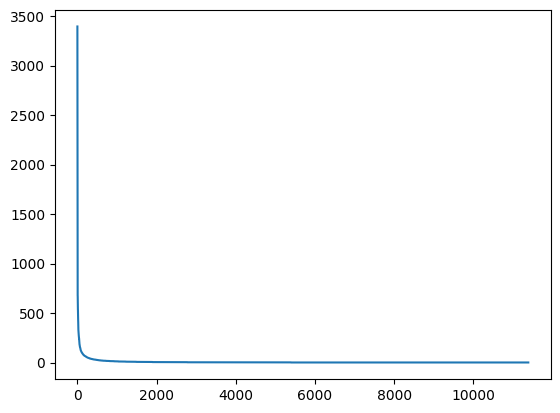

In [126]:
from matplotlib import pyplot as plt

plt.plot(df.cnt.to_numpy())
plt.show()

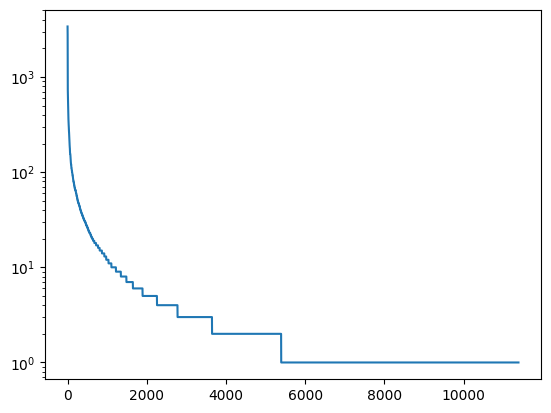

In [127]:
plt.plot(df.cnt.to_numpy())
plt.yscale('log')
plt.show()

# 단어 빈도 분석 한번에 정리

  0%|          | 0/5000 [00:00<?, ?it/s]

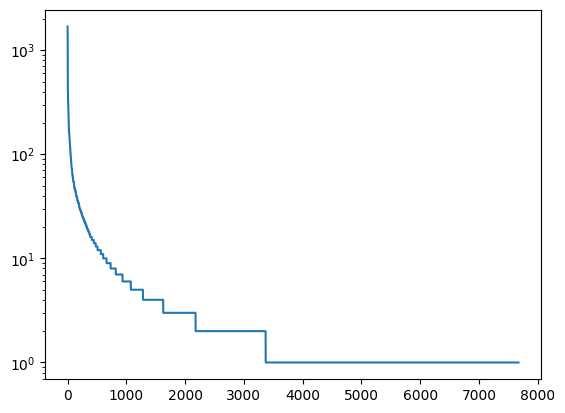

In [128]:
# 전처리 함수 호출해서 train 데이터를 상위 5000개 정제
# def preprocessing : 품사태깅, 정규화, 정규표현식 아니면 지우고, 불용어 제거
preprocessed_text = []
for x in tqdm(train[:5000]):
  preprocessed_text += preprocessing(x)

# 전처리된 말뭉치(preprocessed_text)에서 각 단어의 빈도를 셈
from collections import Counter

cnt = dict(Counter(preprocessed_text))
len(cnt.keys()), len(cnt.values()) # 개수 확인

# word와 cnt 칼럼이 있는 데이터프레임 만들기 + sorting
df = pd.DataFrame(columns = ['word','cnt'])
df['word'] = cnt.keys()
df['cnt'] = cnt.values()
df = df.sort_values(by ='cnt', ascending=False)

# 시각화
plt.plot(df.cnt.to_numpy())
plt.yscale('log')
plt.show()